PROBLEM STATEMENT -
 The aim of this analysis is to understand the relationship between customer income and car purchase behavior for Bright Automotive Company. By analyzing features like total salary, profession, and car price, the project applies statistical methods and linear regression to predict car prices based on a customer’s financial profile, helping the company improve sales targeting and pricing strategies.

- Prathmesh Maurya

  Importing important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing CSV file

In [ ]:
DataFrame = pd.read_csv('/content/bright_automotive_company.csv')

Find the shape of the data

In [ ]:
DataFrame.shape


(1581, 14)

Fetching first five rows of the dataset

In [ ]:
DataFrame.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


Check for null values and find which columns have null values

In [ ]:
DataFrame.isnull().sum()

,0
Age,0
Gender,53
Profession,6
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,13


Calculate the mean value of Age, Orders and Amount

In [ ]:
DataFrame.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


Total Salary vs Car Price

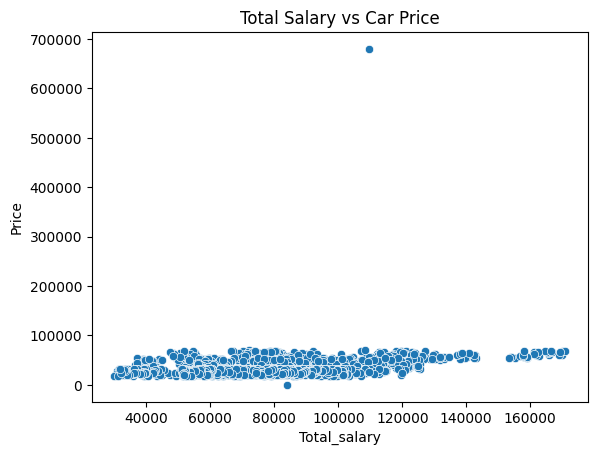

In [ ]:
sns.scatterplot(x='Total_salary', y='Price', data=DataFrame)
plt.title("Total Salary vs Car Price")
plt.show()

Profession vs Car Type

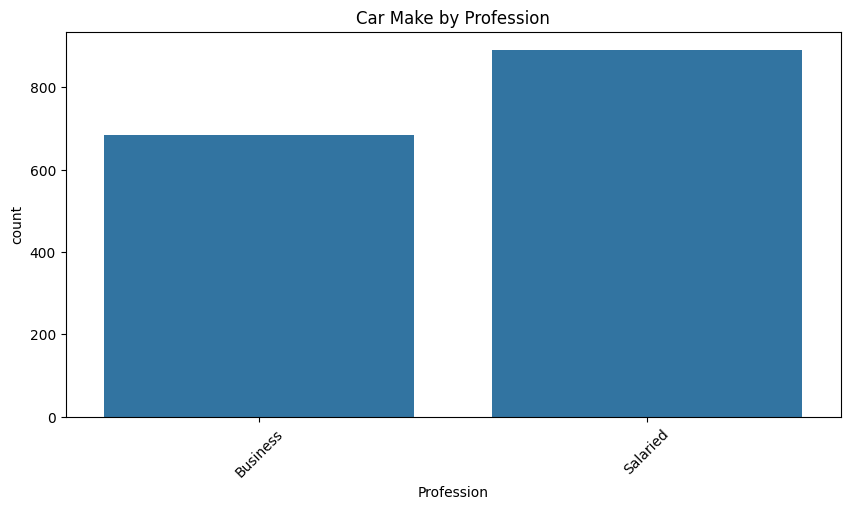

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Profession', data=DataFrame)
plt.title("Car Make by Profession")
plt.xticks(rotation=45)
plt.show()


Checking for outliers

In [ ]:

Q1 = DataFrame.quantile(0.25, numeric_only=True)
Q3 = DataFrame.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

numeric_column = DataFrame.select_dtypes(include=['number']).columns

outliers = DataFrame[((DataFrame[numeric_column] < (Q1 - 1.5 * IQR)) |
               (DataFrame[numeric_column] > (Q3 + 1.5 * IQR))).any(axis=1)]

outliers.head()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
17,49,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100.0,70600.0,165700,64000,SUV
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


Removing Outliers


In [ ]:

df_no_outliers = DataFrame[~((DataFrame[numeric_column] < (Q1 - 1.5 * IQR)) |
                      (DataFrame[numeric_column] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers.head()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV
5,53,Female,NaN,Married,Post Graduate,3,No,No,Yes,79800.0,60500.0,140300,57000,SUV
6,53,Female,NaN,Married,Post Graduate,3,Yes,No,Yes,80900.0,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100.0,40400.0,119500,68000,SUV


Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = DataFrame.copy()
df_scaled[numeric_column] = scaler.fit_transform(DataFrame[numeric_column])


Graph of Total Salay vs Price of car

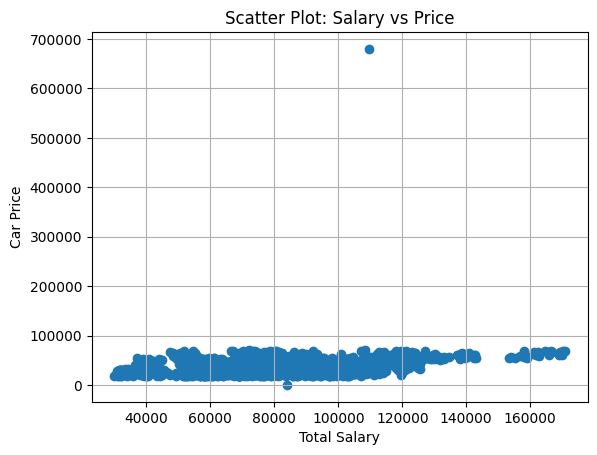

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(DataFrame['Total_salary'], DataFrame['Price'])
plt.xlabel('Total Salary')
plt.ylabel('Car Price')
plt.title('Scatter Plot: Salary vs Price')
plt.grid(True)
plt.show()


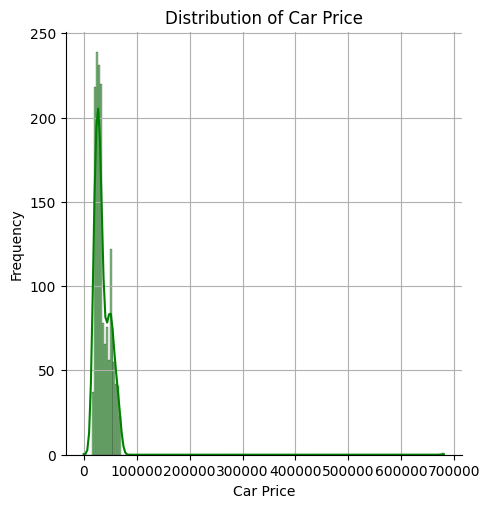

In [ ]:
sns.displot(DataFrame['Price'], kde=True, color='green')
plt.title("Distribution of Car Price")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

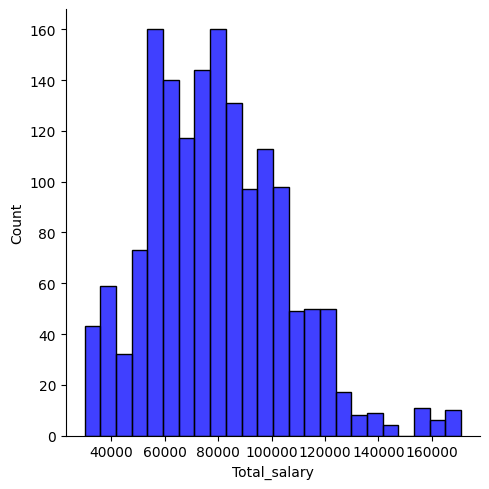

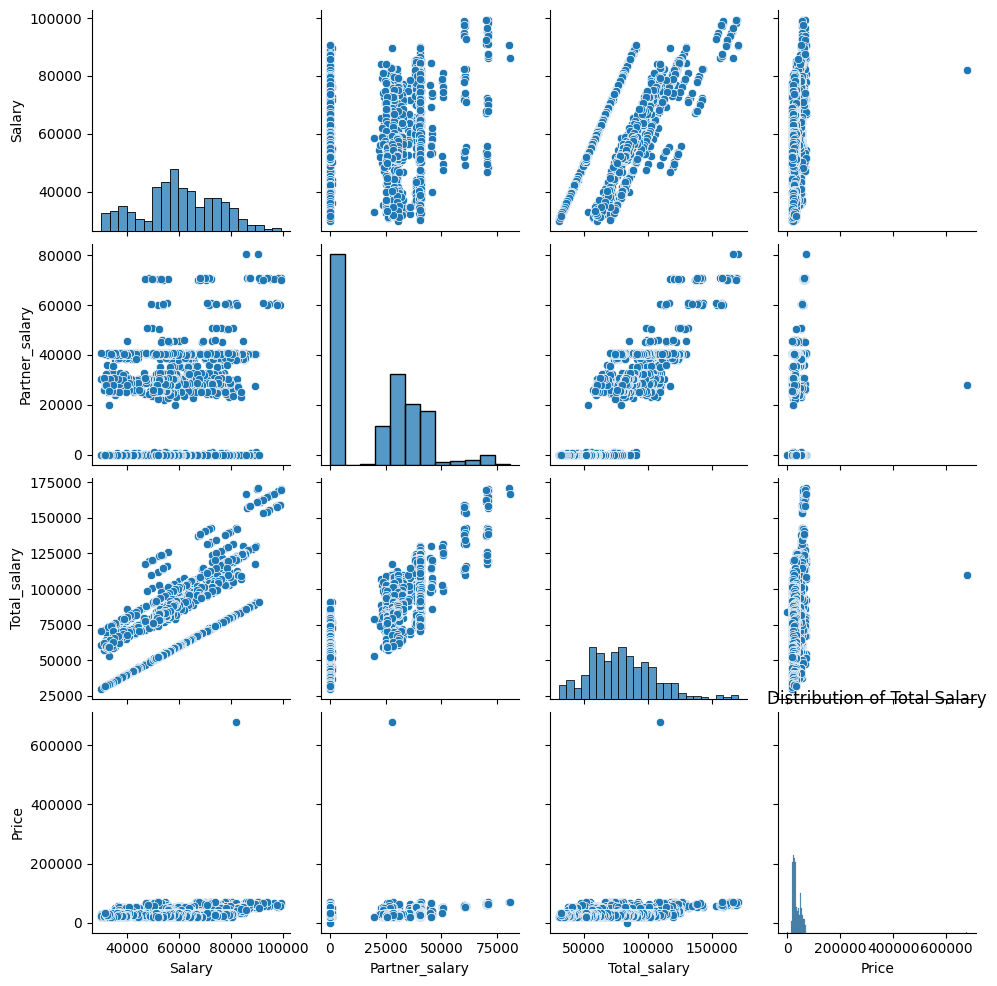

In [ ]:
sns.displot(DataFrame['Total_salary'], color='blue')
sns.pairplot(DataFrame[['Salary', 'Partner_salary', 'Total_salary', 'Price']])

plt.title("Distribution of Total Salary")
plt.xlabel("Total Salary")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
x = DataFrame[['Total_salary']]
y = DataFrame[['Price']]

Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Training Model

In [ ]:
Lin_Reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
Lin_Reg.predict(x_test)

array([[34425.34205508],
       [33132.1468843 ],
       [37450.10364097],
       [31269.06909588],
       [26973.03090143],
       [33877.37799966],
       [40343.35385356],
       [29932.03680067],
       [34710.28336389],
       [49680.66135784],
       [36200.74559462],
       [30721.10504047],
       [30852.61641377],
       [37691.20782535],
       [26205.88122385],
       [36441.849779  ],
       [39970.73829588],
       [35937.72284802],
       [55510.99890746],
       [54765.76779209],
       [30874.53497599],
       [26512.74109488],
       [32693.77563996],
       [36967.8952722 ],
       [40233.76104248],
       [32693.77563996],
       [38041.90482082],
       [34425.34205508],
       [37844.63776087],
       [39532.36705155],
       [36222.66415684],
       [38589.86887623],
       [32891.04269991],
       [32540.34570445],
       [37362.4293921 ],
       [32912.96126213],
       [38195.33475633],
       [31773.19602687],
       [32430.75289336],
       [46107.93571653],


In [ ]:
y_test

,Price
1124,26000
813,23000
1175,30000
534,40000
514,48000
...,...
1213,23000
1040,22000
1393,32000
1281,18000


In [ ]:
y_pred = Lin_Reg.predict(x_test)
y_pred

array([[34425.34205508],
       [33132.1468843 ],
       [37450.10364097],
       [31269.06909588],
       [26973.03090143],
       [33877.37799966],
       [40343.35385356],
       [29932.03680067],
       [34710.28336389],
       [49680.66135784],
       [36200.74559462],
       [30721.10504047],
       [30852.61641377],
       [37691.20782535],
       [26205.88122385],
       [36441.849779  ],
       [39970.73829588],
       [35937.72284802],
       [55510.99890746],
       [54765.76779209],
       [30874.53497599],
       [26512.74109488],
       [32693.77563996],
       [36967.8952722 ],
       [40233.76104248],
       [32693.77563996],
       [38041.90482082],
       [34425.34205508],
       [37844.63776087],
       [39532.36705155],
       [36222.66415684],
       [38589.86887623],
       [32891.04269991],
       [32540.34570445],
       [37362.4293921 ],
       [32912.96126213],
       [38195.33475633],
       [31773.19602687],
       [32430.75289336],
       [46107.93571653],


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Accuracy of the model is - ",r2_score(y_test,y_pred)*100)
print("Error of model is - ",mean_squared_error(y_test,y_pred))

Accuracy of the model is -  15.125375829287947
Error of model is -  146837736.75755134


In [ ]:
x_train

,Total_salary
1227,53100
930,68500
1520,80100
236,62300
1343,59300
...,...
1130,68900
1294,89000
860,104500
1459,55700


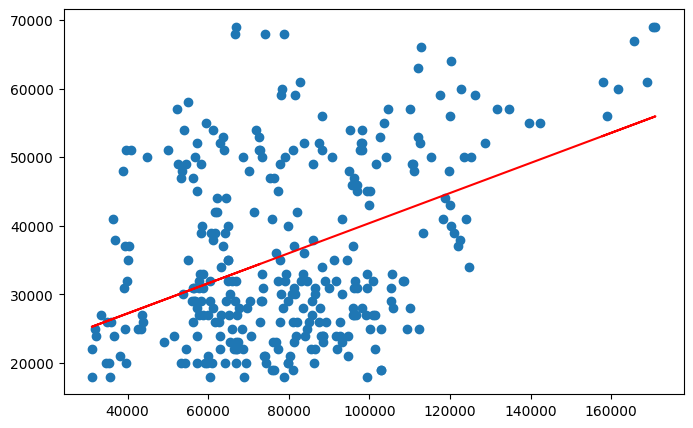

In [ ]:
plt.figure(figsize=(8, 5))

plt.scatter(x_test,y_test)
plt.plot(x_test, Lin_Reg.predict(x_test), 'r')

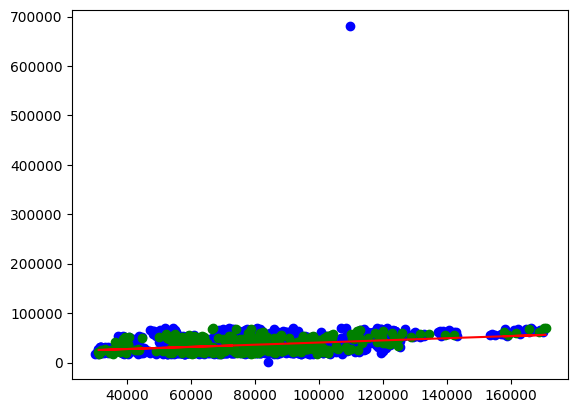

In [ ]:
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Testing Data')
plt.plot(x_test, Lin_Reg.predict(x_test), 'r')

Straight_Line Equation [ y = b0 + b1x ]

In [ ]:
a = Lin_Reg.intercept_

In [ ]:
b = Lin_Reg.coef_

In [ ]:
Individual_Total_salary = 900000
Predicted_Car_Price = a + b * [Individual_Total_salary]
print(f"Predicted price as per each person Total_salary: {Predicted_Car_Price} ")

Predicted price as per each person Total_salary: [[215735.68871089]] 


CONCLUSION - The analysis showed a positive but weak correlation between total salary and car price. While linear regression provided some predictive power, the model achieved limited accuracy (~15%) due to data variability and outliers. This suggests that additional factors beyond income, such as preferences or credit behavior, may influence purchase decisions. Further data enrichment is recommended for better model performance.

